# 🧩 Chunking Strategies for RAG using LlamaIndex

Chunking is one of the most important factors in how well **RAG (Retrieval-Augmented Generation)** performs using **LlamaIndex**.

---

## 📘 What Is Chunking?

Chunking means splitting large text documents into smaller pieces (**nodes**) that can be indexed and retrieved efficiently.

### ✅ Benefits of Proper Chunking
- Improves **retrieval accuracy**
- Reduces **context loss**
- Increases **LLM grounding and relevance**

---




In [ ]:
!pip install nltk tiktoken sentence-transformers llama-index langchain openai faiss-cpu langchain-classic langchain-openai --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.1/467.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sample_text = """
Artificial Intelligence (AI) is transforming industries globally.
It enables automation, enhances decision-making, and powers intelligent systems.
However, AI also brings challenges in ethics, transparency, and data privacy.
As organizations adopt AI technologies, it’s essential to understand their limitations, biases, and long-term impacts on society.
"""

# Save to a file (optional)
with open("sample_doc.txt", "w", encoding="utf-8") as f:
    f.write(sample_text)

print("Sample document created!")


Sample document created!


In [ ]:
import tiktoken
from nltk.tokenize import sent_tokenize

def count_tokens(text, model="gpt-4"):
    """Count approximate tokens for a given text using tiktoken"""
    enc = tiktoken.encoding_for_model(model)
    return len(enc.encode(text))

def print_chunks(chunks):
    """Print chunk info and preview"""
    for i, chunk in enumerate(chunks, 1):
        print(f"\n--- Chunk {i} (Tokens: {count_tokens(chunk)}) ---\n")
        print(chunk[:500] + "..." if len(chunk) > 500 else chunk)


In [ ]:
from sentence_transformers import SentenceTransformer
import tiktoken

# 🧩 Fixed Size Chunking

**Fixed-size chunking** is a straightforward approach where text is divided into uniform chunks based on a predefined character or token count.  

For example, you might split a document into chunks of **500 tokens** each, regardless of whether the chunk ends mid-sentence or across paragraphs.  

To mitigate this, an **overlap feature** can be introduced — where a certain number of tokens or characters from the end of one chunk are repeated at the start of the next.  
This helps preserve context across chunks and prevents loss of meaning at the boundaries.  

---

## ✅ Advantages

- **Simplicity:** Easy to implement and understand.  
- **Efficiency:** Fast processing, especially for large datasets.  
- **Consistency:** Uniform chunk sizes across documents.  
- **Low computational requirements:** Doesn’t need complex algorithms or models.  

---

## ❌ Disadvantages

- **Context fragmentation:** May split sentences or logical units of information.  
- **Inflexibility:** Doesn’t account for varying content density or structure.  
- **Potential information loss:** Important context might be split across chunks.  
- **Sub-optimal for heterogeneous content:** Less effective for documents with varying structures or lengths.  

---


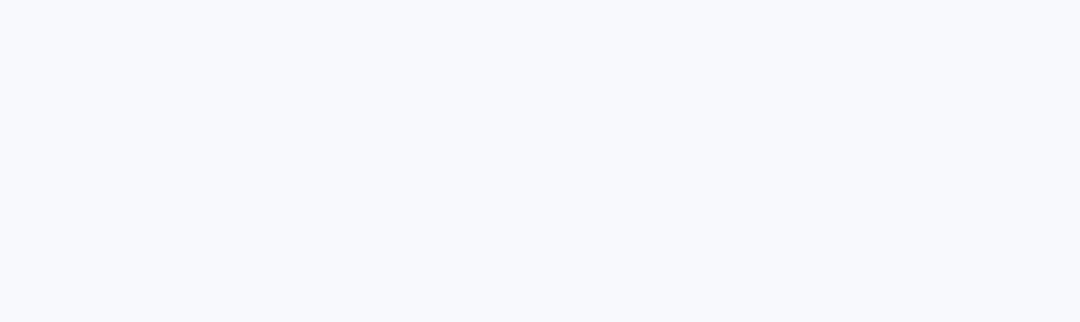

In [ ]:
# Fixed Size Chunking Function
def fixed_size_chunking(text, chunk_size=100, overlap=20):
    """
    Split text into fixed-size chunks with optional overlap.

    Args:
        text (str): input text
        chunk_size (int): number of characters per chunk
        overlap (int): number of overlapping characters between chunks

    Returns:
        List[str]: list of text chunks
    """
    chunks = []
    start = 0
    text_length = len(text)

    while start < text_length:
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(chunk)
        start = end - overlap  # move start back by overlap
        if start < 0:
            start = 0

    return chunks


In [ ]:
# Load sample text
with open("sample_doc.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Create chunks
chunks = fixed_size_chunking(text, chunk_size=100, overlap=20)

# Print chunks
print_chunks(chunks)



--- Chunk 1 (Tokens: 18) ---


Artificial Intelligence (AI) is transforming industries globally.
It enables automation, enhances d

--- Chunk 2 (Tokens: 18) ---

tomation, enhances decision-making, and powers intelligent systems.
However, AI also brings challeng

--- Chunk 3 (Tokens: 18) ---

also brings challenges in ethics, transparency, and data privacy.
As organizations adopt AI technolo

--- Chunk 4 (Tokens: 20) ---

ns adopt AI technologies, it’s essential to understand their limitations, biases, and long-term impa

--- Chunk 5 (Tokens: 8) ---

, and long-term impacts on society.



# 🔁 Recursive-Based Chunking

**Recursive Character Text Splitting** is a more adaptive approach that breaks text into chunks by using multiple separators in a specified order.  
It attempts to split text by meaningful boundaries — such as paragraphs, sentences, or markers — following a descending order of importance.

The method recursively splits text until the chunks meet a specified size, while preserving the logical and structural integrity of the content.

---

### 📘 Example

For example, in a **Python code document**, the process might:
1. First, try splitting by **class definitions**.  
2. Then, by **function definitions**.  
3. Finally, by **line breaks**.  

This ensures that chunks are as meaningful and self-contained as possible.

---

## ✅ Advantages

- **Meaningful Chunks:** Preserves semantic and structural integrity by splitting at logical points such as paragraphs or sections.  
- **Flexibility:** Adapts to various types of content using multiple separators — suitable for both text and code.  
- **Fine-Grained Control:** Allows precise tuning of chunk size and overlap, maintaining important context.  
- **Handles Complex Content:** Particularly effective for structured or hierarchical data such as technical documentation or programming code.  

---

## ❌ Disadvantages

- **Increased Complexity:** Requires a more advanced setup compared to fixed-size chunking.  
- **Higher Computational Overhead:** Recursive calls and multiple separator checks can slow down processing for large datasets.  
- **Dependence on Separators:** If text lacks clear separators, it may not split effectively, resulting in uneven chunk sizes.  
- **Slower Performance:** Can be slower than simpler chunking methods for very large or unstructured datasets.  

---


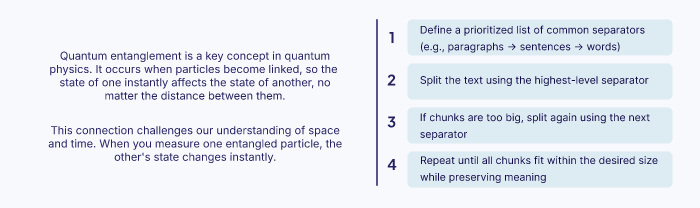

In [ ]:
# Recursive-Based Chunking Function
def recursive_chunking(text, chunk_size=100, overlap=20, separators=None):
    """
    Recursively split text using a list of separators until chunks are within chunk_size.

    Args:
        text (str): input text
        chunk_size (int): max number of characters per chunk
        overlap (int): number of overlapping characters between chunks
        separators (list): list of separators in descending priority
            e.g., ["\n\n", "\n", ".", " "]

    Returns:
        List[str]: list of text chunks
    """
    if separators is None:
        separators = ["\n\n", "\n", ".", " "]

    # Base case: text is already small enough
    if len(text) <= chunk_size or len(separators) == 0:
        return [text]

    sep = separators[0]
    parts = text.split(sep)

    chunks = []
    temp = ""

    for part in parts:
        if temp:
            candidate = temp + sep + part
        else:
            candidate = part

        if len(candidate) > chunk_size:
            # Recursive call with next separator
            sub_chunks = recursive_chunking(candidate, chunk_size, overlap, separators[1:])
            for sub_chunk in sub_chunks:
                if chunks and overlap > 0:
                    # Apply overlap with previous chunk
                    sub_chunk = chunks[-1][-overlap:] + sub_chunk
                chunks.append(sub_chunk)
            temp = ""
        else:
            temp = candidate

    if temp:
        if chunks and overlap > 0:
            temp = chunks[-1][-overlap:] + temp
        chunks.append(temp)

    return chunks


In [ ]:
# Load sample text
with open("sample_doc.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Create recursive chunks
rec_chunks = recursive_chunking(text, chunk_size=100, overlap=20, separators=["\n\n", "\n", ".", " "])

# Print chunks
print_chunks(rec_chunks)



--- Chunk 1 (Tokens: 19) ---

Artificial Intelligence (AI) is transforming industries globally.
It enables automation, enhances decision-making,

--- Chunk 2 (Tokens: 19) ---

ces decision-making,ces decision-making,ces decision-making,ces decision-making,and powers intelligent systems

--- Chunk 3 (Tokens: 23) ---

 intelligent systems intelligent systemsHowever, AI also brings challenges in ethics, transparency, and data privacy.
As organizations adopt AI

--- Chunk 4 (Tokens: 35) ---

ganizations adopt AIganizations adopt AIganizations adopt AIganizations adopt AItechnologies, it’s essential to understand their limitations, biases, and long-term impacts on society


# 📄 Document-Based Chunking

**Document-based chunking** treats the entire document as a single chunk or divides it as little as possible.  
This approach preserves the full structure and context of the document, making it ideal for content where splitting may disrupt the flow or meaning.

It is best suited for tasks that require analyzing **large, detailed texts**, such as legal, medical, or scientific documents.  
This method ensures that **key information and context remain intact** across the document.

---

### 📘 Example

For instance, a **legal document** might be chunked by individual **charges**, with each charge treated as a single chunk.  
This maintains the document’s structural integrity and ensures that no important legal context is lost.

---

## ✅ Advantages

- **Full Context Preservation:** Retains the entire document’s flow and meaning without cutting through critical sections.  
- **Ideal for Structured Texts:** Works well for highly structured documents such as legal contracts, policies, or medical reports.  
- **Simplicity:** Straightforward to implement without complex chunking logic or rules.  

---

## ❌ Disadvantages

- **Scalability Issues:** Not suitable for very large documents that exceed token or memory limits, as they may be too large to process at once.  
- **Reduced Efficiency:** Processing large documents as a whole can lead to inefficiencies and higher resource consumption.  
- **Limited Specificity:** Lacks granularity, making it harder to extract or retrieve specific sections or details within the document.  

---


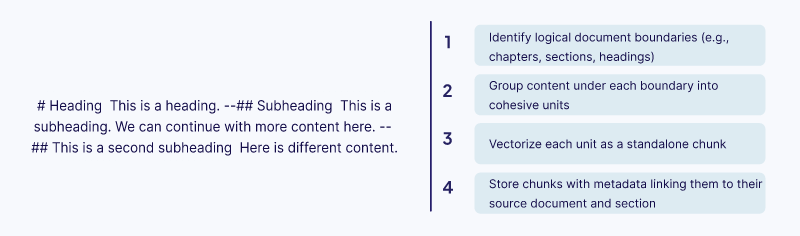

In [ ]:
# Document-Based Chunking Function
def document_based_chunking(text):
    """
    Treat the entire document as a single chunk.

    Args:
        text (str): input text

    Returns:
        List[str]: list with a single chunk (the full document)
    """
    return [text]


In [ ]:
# Load sample text
with open("sample_doc.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Create document-based chunks
doc_chunks = document_based_chunking(text)

# Print chunks
print_chunks(doc_chunks)



--- Chunk 1 (Tokens: 63) ---


Artificial Intelligence (AI) is transforming industries globally.
It enables automation, enhances decision-making, and powers intelligent systems.
However, AI also brings challenges in ethics, transparency, and data privacy.
As organizations adopt AI technologies, it’s essential to understand their limitations, biases, and long-term impacts on society.



# 🧠 Semantic Chunking

**Semantic chunking** breaks text into chunks based on **meaning** rather than fixed sizes.  
It ensures that each chunk contains coherent and contextually related information by analyzing shifts in the text’s **semantic structure**.

This is typically achieved by measuring **differences in sentence embeddings**, which represent sentence meanings mathematically.

---

### 📘 Example

For example, the chunker splits the text when it detects a **significant change in meaning** between two sentences based on their embeddings.  
Adjustable **thresholds** can be used to control when these breaks occur, ensuring that each chunk remains logically and semantically connected.

---

## ✅ Advantages

- **Preserves Meaning:** Chunks are created around logical content breaks, ensuring coherent and self-contained units of information.  
- **Adaptable to Diverse Content:** Works well with documents containing multiple topics or sections (e.g., research papers, technical documents).  
- **Improves Retrieval Accuracy:** Maintains semantic integrity, resulting in more relevant and precise responses during information retrieval.  

---

## ❌ Disadvantages

- **Complex Setup:** Requires advanced methods to measure semantic shifts between sentences.  
- **Higher Computational Cost:** Analyzing embeddings and semantic similarity can be resource-intensive, especially for long documents.  
- **Threshold Tuning:** The chunking quality depends on correctly setting similarity thresholds, which may vary across content types or domains.  

---


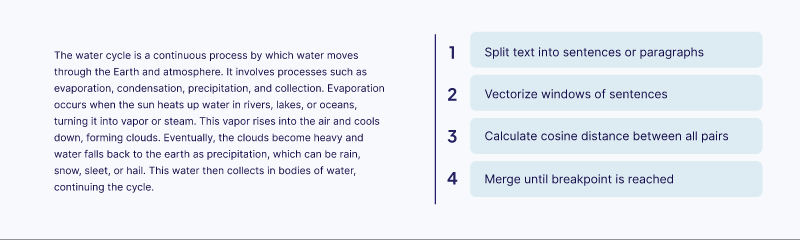

In [ ]:
!pip install -q sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from nltk.tokenize import sent_tokenize


In [ ]:
# Load a pre-trained embedding model
embed_model = SentenceTransformer('all-MiniLM-L6-v2')

def semantic_chunking(text, chunk_size=3, similarity_threshold=0.8):
    """
    Split text into semantic chunks using sentence embeddings.

    Args:
        text (str): input text
        chunk_size (int): max number of sentences per chunk
        similarity_threshold (float): cosine similarity threshold to detect semantic shifts

    Returns:
        List[str]: list of semantically coherent chunks
    """
    sentences = sent_tokenize(text)
    chunks = []
    current_chunk = []

    # Compute embeddings for each sentence
    embeddings = embed_model.encode(sentences)

    for i, sentence in enumerate(sentences):
        if not current_chunk:
            current_chunk.append(sentence)
            continue

        # Compute cosine similarity between last sentence in chunk and current sentence
        last_embedding = embed_model.encode([current_chunk[-1]])[0]
        curr_embedding = embeddings[i]
        cosine_sim = np.dot(last_embedding, curr_embedding) / (np.linalg.norm(last_embedding) * np.linalg.norm(curr_embedding))

        if cosine_sim < similarity_threshold or len(current_chunk) >= chunk_size:
            # Start new chunk if semantic shift detected or max chunk size reached
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
        else:
            current_chunk.append(sentence)

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Load sample text
with open("sample_doc.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Create semantic chunks
semantic_chunks = semantic_chunking(text, chunk_size=2, similarity_threshold=0.75)

# Print chunks
print_chunks(semantic_chunks)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


# 🔤 Token-Based Chunking

**Token-based chunking** splits text based on a predefined number of **tokens** (words or subwords) rather than characters or sentences.  
Tokens are the smallest meaningful units of text, and the chunk size is controlled by a set token limit.

For example, a document might be divided into chunks of **300 tokens** each, ensuring that each chunk remains within a model’s token limit for processing — even if it cuts across sentences or paragraphs.

---

## ✅ Advantages

- **Optimized for Language Models:** Ensures chunks stay within the token limits of models like GPT, improving processing efficiency.  
- **Precise Control over Chunk Size:** Allows fine-tuning of the number of tokens per chunk to match specific model requirements.  
- **Consistency Across Content:** Divides text into consistent token counts, simplifying processing for large datasets.  

---

## ❌ Disadvantages

- **Context Fragmentation:** May break sentences or paragraphs mid-way, leading to incomplete information in chunks.  
- **Ignores Semantic Structure:** Focuses solely on token count, potentially losing important context or meaning.  
- **Limited Flexibility:** Does not adapt to varying content density or natural language boundaries, which may reduce chunk coherence.  

---


In [ ]:
!pip install -q tiktoken


In [ ]:
import tiktoken
# Initialize tokenizer for GPT models
tokenizer = tiktoken.encoding_for_model("gpt-4")  # or "gpt-3.5-turbo"

def token_based_chunking(text, max_tokens=50, overlap=10):
    """
    Split text into chunks based on token count.

    Args:
        text (str): input text
        max_tokens (int): max tokens per chunk
        overlap (int): number of overlapping tokens between chunks

    Returns:
        List[str]: list of text chunks
    """
    tokens = tokenizer.encode(text)
    chunks = []
    start = 0
    total_tokens = len(tokens)

    while start < total_tokens:
        end = start + max_tokens
        chunk_tokens = tokens[start:end]
        chunk_text = tokenizer.decode(chunk_tokens)
        chunks.append(chunk_text)
        start = end - overlap  # move start back by overlap

    return chunks


In [ ]:
# Load sample text
with open("sample_doc.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Create token-based chunks
token_chunks = token_based_chunking(text, max_tokens=15, overlap=5)

# Print chunks
print_chunks(token_chunks)



--- Chunk 1 (Tokens: 15) ---


Artificial Intelligence (AI) is transforming industries globally.
It enables automation

--- Chunk 2 (Tokens: 15) ---

 globally.
It enables automation, enhances decision-making, and powers intelligent systems.


--- Chunk 3 (Tokens: 15) ---

 and powers intelligent systems.
However, AI also brings challenges in ethics, transparency

--- Chunk 4 (Tokens: 15) ---

 challenges in ethics, transparency, and data privacy.
As organizations adopt AI technologies

--- Chunk 5 (Tokens: 15) ---

As organizations adopt AI technologies, it’s essential to understand their limitations, biases

--- Chunk 6 (Tokens: 13) ---

 understand their limitations, biases, and long-term impacts on society.


--- Chunk 7 (Tokens: 3) ---

 on society.



# ✍️ Sentence-Based Chunking

**Sentence-based chunking** divides text into complete sentences, ensuring that each chunk contains **full thoughts** and preserves the **logical flow** of information.  
This method splits text at natural sentence boundaries to maintain coherence and readability.

For example, a document might be broken into chunks where each contains **5 to 10 sentences**, keeping the size manageable while maintaining semantic integrity.

---

## ✅ Advantages

- **Preserves Context:** Each chunk contains complete sentences, preventing loss of meaning or disruption in the flow of information.  
- **Better Readability:** Chunks are more coherent and readable, making them easier for both models and users to interpret.  
- **Natural Division:** The text is split at logical boundaries, preventing chunks from cutting through ideas mid-sentence.  

---

## ❌ Disadvantages

- **Variable Chunk Sizes:** Sentence lengths vary, so chunks can differ significantly in size, reducing consistency.  
- **Inefficient for Long Sentences:** In documents with very long sentences, chunks may exceed token limits or hold too much information.  
- **Less Control Over Chunk Size:** Sentence-based chunking can produce uneven chunks, which may affect model performance under strict token constraints.  

---


In [ ]:
from nltk.tokenize import sent_tokenize

def sentence_based_chunking(text, sentences_per_chunk=3, overlap=1):
    """
    Split text into chunks containing full sentences.

    Args:
        text (str): input text
        sentences_per_chunk (int): number of sentences per chunk
        overlap (int): number of overlapping sentences between chunks

    Returns:
        List[str]: list of sentence-based chunks
    """
    sentences = sent_tokenize(text)
    chunks = []
    start = 0
    total_sentences = len(sentences)

    while start < total_sentences:
        end = start + sentences_per_chunk
        chunk = " ".join(sentences[start:end])
        chunks.append(chunk)
        start = end - overlap  # move start back by overlap

    return chunks


In [ ]:
# Load sample text
with open("sample_doc.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Create sentence-based chunks
sentence_chunks = sentence_based_chunking(text, sentences_per_chunk=2, overlap=1)

# Print chunks
print_chunks(sentence_chunks)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


# 🤖 Agentic Chunking

**Agentic chunking** breaks text into smaller, **semantically meaningful sections** based on the **roles or tasks** an AI agent needs to perform.  
Instead of treating a document as a uniform whole, this method organizes content into **“actionable” chunks** — each optimized for a specific purpose such as answering questions, summarizing, or decision-making.

These chunks are structured to give the AI **clear task cues**, making processing more efficient, focused, and goal-oriented.

For example, if a document describes a process, agentic chunking would split the text into parts like:  
- *Step 1: Preparation*  
- *Step 2: Execution*  
- *Step 3: Conclusion*  

Each section aligns with a specific **agent action** or **goal**.

---

## ✅ Advantages

- **Task-Oriented Efficiency:** Optimizes the AI’s performance by tailoring chunks to specific tasks or actions, improving decision-making and reducing confusion.  
- **Better Focus on Relevant Data:** Enables the AI to concentrate on exactly what’s needed for each task, leading to more accurate and context-aware results.  
- **Flexibility:** Easily adaptable to various applications such as Q&A systems, summarization, or task-specific agents.  

---

## ❌ Disadvantages

- **Complex Setup:** Requires careful definition of agent roles and task-specific chunking rules, increasing setup effort.  
- **Over-Specialization:** May fragment complex documents into overly specific tasks, missing broader patterns or connections.  
- **Potential Context Loss:** Since chunks are optimized for individual tasks, the AI may lose global document context, affecting holistic understanding (e.g., summarization).  

---

## 💻 Example in LlamaIndex

While there isn’t a built-in `AgenticSplitter`, you can simulate **agentic chunking** by defining custom logic based on structured document markers or agent goals:




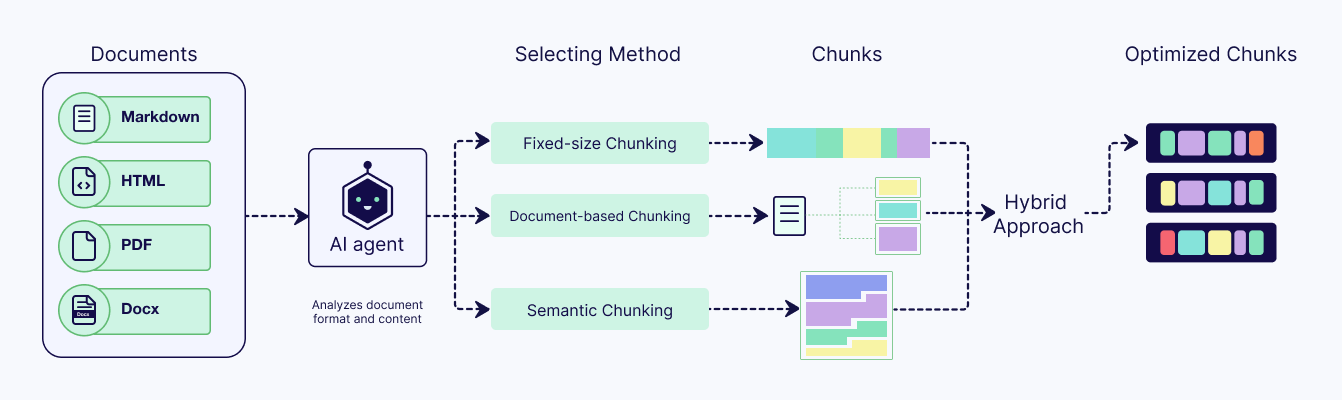

In [ ]:
def agentic_chunking(text, task_keywords=None, overlap=0):
    """
    Split text into task-oriented chunks based on keywords or markers.

    Args:
        text (str): input text
        task_keywords (list): list of task indicators (e.g., ["Step 1", "Step 2", "Conclusion"])
        overlap (int): number of overlapping characters between chunks

    Returns:
        List[str]: list of agentic chunks
    """
    if task_keywords is None:
        # Default markers for tasks
        task_keywords = ["Step 1", "Step 2", "Step 3", "Step 4", "Step 5", "Conclusion"]

    chunks = []
    start_idx = 0
    text_lower = text.lower()

    # Find positions of all task keywords
    positions = []
    for keyword in task_keywords:
        idx = text.find(keyword)
        if idx != -1:
            positions.append((idx, keyword))

    # Sort positions
    positions.sort()

    # Create chunks based on positions
    for i, (pos, keyword) in enumerate(positions):
        end = positions[i + 1][0] if i + 1 < len(positions) else len(text)
        chunk = text[pos:end]
        if overlap > 0 and chunks:
            chunk = chunks[-1][-overlap:] + chunk
        chunks.append(chunk)

    # If no keywords found, fallback to entire text as one chunk
    if not chunks:
        chunks = [text]

    return chunks


In [ ]:
sample_task_text = """
Step 1: Preparation
Artificial Intelligence (AI) is transforming industries globally. It enables automation and enhances decision-making.

Step 2: Execution
AI powers intelligent systems, but also brings challenges in ethics, transparency, and data privacy.

Step 3: Conclusion
Organizations must understand AI limitations, biases, and long-term impacts on society.
"""

# Create agentic chunks
agentic_chunks = agentic_chunking(sample_task_text, task_keywords=["Step 1", "Step 2", "Step 3"])

# Print chunks
print_chunks(agentic_chunks)



--- Chunk 1 (Tokens: 25) ---

Step 1: Preparation
Artificial Intelligence (AI) is transforming industries globally. It enables automation and enhances decision-making.



--- Chunk 2 (Tokens: 24) ---

Step 2: Execution
AI powers intelligent systems, but also brings challenges in ethics, transparency, and data privacy.



--- Chunk 3 (Tokens: 22) ---

Step 3: Conclusion
Organizations must understand AI limitations, biases, and long-term impacts on society.



## Additional Reference



*   https://weaviate.io/blog/chunking-strategies-for-rag
*   https://community.databricks.com/t5/technical-blog/the-ultimate-guide-to-chunking-strategies-for-rag-applications/ba-p/113089

